
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [52]:

import numpy as np
import matplotlib.pyplot as plt


In [53]:
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        self.std[self.std == 0] = 1.0

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been Fitted yet.")

        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [54]:

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        self.history = []

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            error = y_pred - y
            mse = (1 / (2*n_samples)) * np.sum(error**2)
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            total_loss = mse + l2_penalty
            self.history.append(total_loss)

            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [55]:
X_train = 2 * np.random.rand(100, 1)
y_train = 7 + 5 * X_train.flatten() + np.random.randn(100) * 0.5

In [56]:
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)

In [57]:
lin_reg = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
lin_reg.fit(X_train_scaled, y_train)
predictions = lin_reg.predict(X_train_scaled)

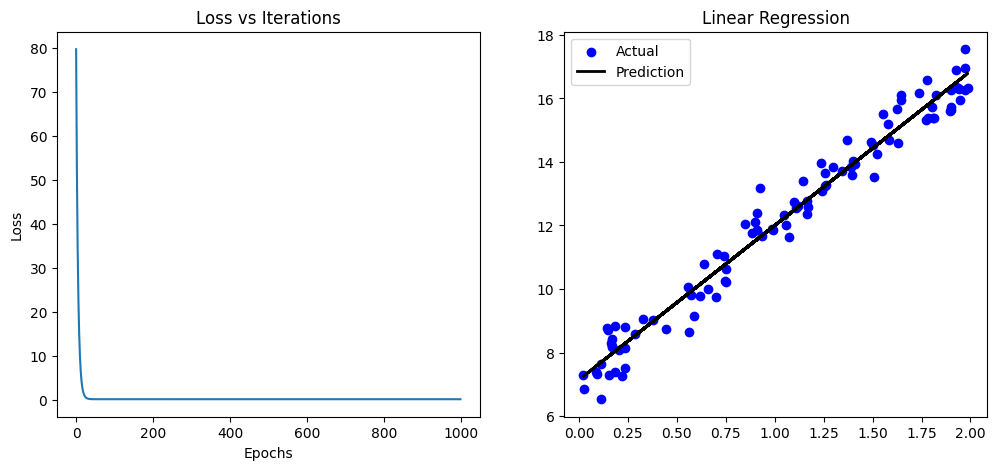

In [58]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lin_reg.history)
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, predictions, color='black', linewidth=2, label='Prediction')
plt.title("Linear Regression")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


The **Binary Cross Entropy Loss** with L2 Regularization is:

$$J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$$

The gradient update rules are:

$$dw = \frac{1}{m} X^T (\hat{y} - y) + \frac{\lambda}{m} w$$

$$db = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

In [59]:

def sigmoid(z):
    z = np.clip(z, -500, 500)

    return 1 / (1 + np.exp(-z))


In [60]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.history = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias

            y_pred = sigmoid(linear_model)

            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)

            bce_loss = - (1 / n_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights ** 2)
            self.history.append(bce_loss + l2_penalty)

            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [61]:
from sklearn.datasets import make_classification

In [62]:
X_class, y_class = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                       n_clusters_per_class=1, random_state=42)

In [63]:
scaler_log = StandardScalerManual()
X_class_scaled = scaler_log.fit_transform(X_class)

In [64]:
log_reg = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
log_reg.fit(X_class_scaled, y_class)

In [65]:
final_preds = log_reg.predict(X_class_scaled)
accuracy = np.mean(final_preds == y_class)

In [66]:
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")

Final Training Accuracy: 84.00%


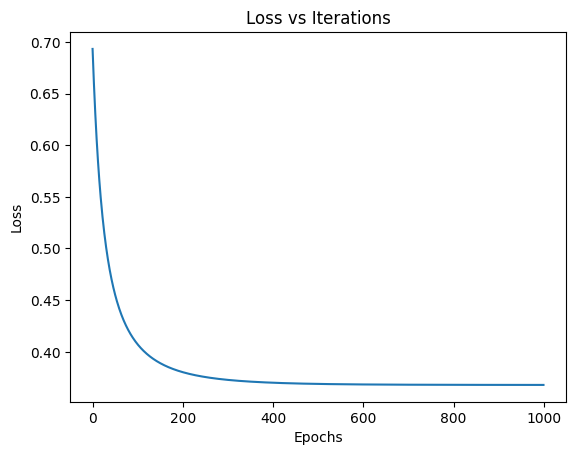

In [67]:
plt.plot(log_reg.history)
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [68]:
from sklearn.cluster import KMeans

def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n_rows, n_cols = M.shape

    flat_data = M.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(flat_data)

    labels_flat = kmeans.labels_
    assignment_table = labels_flat.reshape(n_rows, n_cols)

    centroids = kmeans.cluster_centers_

    cookbook = {i: [] for i in range(k)}

    for r in range(n_rows):
        for c in range(n_cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    return assignment_table, cookbook, centroids

In [69]:
M = np.random.randint(0, 255, size=(10, 10))

assignment, cookbook, centroids = kmeans_matrix(M, k=3)

In [70]:
print("Centroids (Cluster centers):")
print(centroids.flatten())

Centroids (Cluster centers):
[208.125    42.      118.59375]


In [71]:
print("Partial Assignment Table (Top 5 rows):")
print(assignment[:5])
print(f"\nExample positions for Cluster 0: {cookbook[0][:5]} ...")

Partial Assignment Table (Top 5 rows):
[[2 0 2 0 1 2 1 0 2 0]
 [2 1 0 2 1 0 1 1 0 0]
 [0 1 2 0 0 2 1 0 2 1]
 [0 1 0 2 1 2 1 0 1 2]
 [2 2 1 2 0 2 0 1 1 0]]

Example positions for Cluster 0: [(0, 1), (0, 3), (0, 7), (0, 9), (1, 2)] ...



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
